# CIFAR-10 - Object Recognition in Images- for beginners (score: ~90%)

This notebook refers to Kaggle competition "CIFAR-10 - Object Recognition in Images",
which can be found here: https://www.kaggle.com/c/cifar-10 . <br>
It is written for begginers as we were at when we joined the competition. <br>
The notebook was checked on a clean environment and it installs everything needed. <br>
We hope it will help you to get started. Feel free to contact us with any question or comment. <br><br>
Maor Vaknin - vaknin.mj@gmail.com <br>
Itay Cohen - itaycohen89@gmail.com <br>

## 1. Data

### This section downloads and builds the data from Kaggle and installs the needed packages.
### You only need to run it once. If It's not your first run, you can jump to section 2.

We found two versions of the data- <br>
> 1. from Kaggle <br>
> 2. from Kers datasets <br>

The colors in the Kaggle dataset are different from those in the Keras dataset. <br>
However, we found that the Keras dataset is easier to work with, <br>
and you can find some commented lines regarding the keras dataset. <br>
This notebook uses the Kaggle dataset in order to make submission to Kaggle easier. <br>

### Install Kaggle API and download the data

In [ ]:
!pip install py7zr

In [ ]:
!python -m py7zr x ../input/cifar-10/train.7z /kaggle/working/

In [ ]:
!python -m py7zr x ../input/cifar-10/test.7z /kaggle/working/

In [ ]:
!ls ../working

In [ ]:
train_images_path = "/kaggle/working/train"
test_images_path = "/kaggle/working/test"

### Prepare the data

### prerequisites

In [ ]:
# !conda install --yes -c anaconda tensorflow

# !conda install --yes -c conda-forge glob2
# !conda install --yes -c conda-forge opencv

# !conda install --yes -c anaconda numpy
# !conda install --yes -c anaconda pandas

# !conda install --yes -c conda-forge scikit-learn 
# !conda install --yes -c anaconda pydot
# !conda install --yes -c conda-forge matplotlib

In [ ]:
# !conda update conda

In [ ]:
!pip install tensorflow-gpu

!pip install glob2
!pip install opencv

!pip install numpy
!pip install pandas

!pip install scikit-learn 
!pip install pydot
!pip install matplotlib

The data contains two folders and two files: <br>
> train - a folder with 50,000 train images, which are labeled in trainLabels.csv <br>
> test - a folder with 300,000 test Images with no labels <br>
> trainLabels.csv - contains the labels of the train images <br>
> sampleSubmission.csv - an example of the submission file expected by Kaggle

In [ ]:
!ls /kaggle/working

In [ ]:
import glob
import os
import cv2
import numpy as np 
        
# Since the folders only contain Images, the size of the datasets is the number of files in it's folder
num_of_train_images = len(glob.glob(train_images_path+"/*"))
num_of_test_images = len(glob.glob(test_images_path+"/*"))

# Let's create a dataset from the images
train_images = [[]]*num_of_train_images
for dir_name, _, filenames in os.walk('/kaggle/working/train'):
    for filename in filenames:
        image_index = int(filename.split(".")[0])-1
        img = cv2.imread(os.path.join(dir_name,filename))
        # Add the image to the dataset
        train_images[image_index] = img
        
test_images = [[]]*num_of_test_images
for dir_name, _, filenames in os.walk('/kaggle/working/test'):
    for filename in filenames:
        image_index = int(filename.split(".")[0])-1
        img = cv2.imread(os.path.join(dir_name,filename))
        # Add the image to the dataset
        test_images[image_index] = img
        
        
# The RGB values are between 0 and 255, let's divide them so the values will be between 0 and 1
train_images = np.asarray(train_images, dtype=float)/255
test_images = np.asarray(test_images, dtype=float)/255



# # If you want, you can save the dataset and load it, instead of running this block each time
# np.save("../working/train_images.npy", train_images)
# np.save("../working/test_images.npy", test_images)

In [ ]:
test_images.shape

## 2. data exploration

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# for Keras dataset only
# Loading the dataset from Keras. Note: here we are also given the test labels.

# import pandas as pd
# import tensorflow as tf
# from tensorflow import keras
# data = keras.datasets.cifar10
# (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
# train_labels = pd.read_csv('../input/cifar-10/trainLabels.csv')
# keras.utils.to_categorical(train_labels).astype('uint8')

In [ ]:
# train_images = np.load("../working/train_images.npy")
# test_images = np.load("../working/test_images.npy")

In [ ]:
test_images.shape

In [ ]:
test_images.shape

In [ ]:
train_labels = pd.read_csv('/kaggle/input/cifar-10/trainLabels.csv')

print("Number of train images: ", train_images.shape[0])
print("Number of test images: ", test_images.shape[0])

The images come in RBG format, 32X32 pixels. Therefore (32,32,3). <br>
There are 50,000 train images and 300,000 test images (in the Kaggle dataset) <br>
Let's plot some train images with their true labels:

In [ ]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 2
for i in range(1, columns*rows +1):
    img = train_images[i]
    fig.add_subplot(rows, columns, i, title=[train_labels.label[i]])
    plt.imshow(img)
plt.show()

## 3. Build the Model

In [ ]:
import numpy as np 
import pandas as pd 
from tensorflow import keras

# Model architecture
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, datasets,models,layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, DepthwiseConv2D, BatchNormalization
from tensorflow.keras.models import load_model

# Data processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
# Make sure you are running on a GPU!

In [ ]:
train_labels.head(5)

In [ ]:
classes = list(set(list(train_labels.label)))
classes

In [ ]:
num_classes=len(classes)

In [ ]:
labels_dict =  {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
labels_dict_reversed = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

In [ ]:
train_labels['Category'] = train_labels.label.map(labels_dict_reversed)

In [ ]:
# The categories are represented by numbers from 0 to 9.
# Our network needs another representation- a vector of 0's and 1's.
# This function converts the categories to a One-hot vector.
# For example, if the label is 3, then the function will return [0,0,0,1,0,0,0,0,0,0]
train_labels_categories = keras.utils.to_categorical(train_labels.Category, num_classes)#.astype('uint8')

# Splitting the training data into train set and validation set
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels_categories, random_state=0, test_size=0.05)

# for Keras dataset only
# x_test = test_images.astype('float32')/255
# y_test = keras.utils.to_categorical(test_labels, num_classes).astype('uint8')

In [ ]:
train_labels_categories

In [ ]:
x_train.shape

In [ ]:
x_val.shape

In order to avoid Overfitting, it is recommended to use augmentation. <br>
For example, we can rotate the image, change the zoom and the centeralization.

In [ ]:
# Data augumetation
datagen = ImageDataGenerator(
        rotation_range=0.3,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=True)


In [ ]:
model_layers = [
    Conv2D(32, (3, 3), activation='relu', strides=(1,1), padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu, depth_multiplier=3),
#     MaxPooling2D(2, 2),
    Dropout(rate =0.1),
    
    
    Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu),
#     MaxPooling2D(2, 2),
    Dropout(rate = 0.1),
    
    Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu),
#     MaxPooling2D(2, 2),
    Dropout(rate = 0.4),
    
    Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(1,1), strides=(1, 1), padding='same', activation=keras.activations.relu),
    
    
    Conv2D(256, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu),
    
    
    
    Conv2D(512, (1, 1), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(1,1), strides=(1, 1), padding='same', activation=keras.activations.relu),
    
#     MaxPooling2D(2, 2),
    Dropout(rate = 0.4),
    
    Flatten(),
    Dropout(rate = 0.3),
    Dense(2048, activation='relu'),
    Dropout(rate = 0.3),
    Dense(512, activation='relu'),
    Dropout(rate = 0.4),
    Dense(10, activation='softmax')
] 
model = Sequential(model_layers)


In [ ]:
# A summary of the model. 
# We can see how many parameters are in each layer and the total number of parameters.
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Visualization of the model
keras.utils.plot_model(model)

In [ ]:
# The last epoch does not necessarily produces the best model. 
# We want to choose our model wisely,
# so we will save the model that achieved the highest accuracy on the validation set
mcp_save = ModelCheckpoint('../working/best_model', save_best_only=True, monitor='val_accuracy', mode='max')

## 4. Train the model

In [ ]:
# Training the model on the augmented train set
# We reached a score of ~90% after 100 epochs. 5 epochs won't get a score near that, but on Kaggle each epcoh takes a long time.
# Choose the number of epochs that fits your machine. Same for batch_size, which we set to 512 on my machine.
num_of_epochs = 5
batch_size = 64 
# The number of iteration in one epoch is ceil((size of training data)/(batch size)). ceil(47,500/64)=ceil(742.1875)=743
model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), validation_data=(x_val, y_val), callbacks=[mcp_save], epochs=num_of_epochs)

We can see that the train accuracy keeps improving but the validation accuracy is not, Which means we are Overfitting the model to the data.

In [ ]:
# for Keras dataset only
# model.evaluate(x_test, y_test)

## 5. Predict and create Submission file for Kaggle

In [ ]:
# Take the best model under the criterion chosen.
# Here we took the model that achieved the highest accuracy on the validation set.
model_ = load_model('../working/best_model', compile=False)

In [ ]:
# Now let's use our model to predict the classes of each image in the test set
test_predictions = model.predict_classes(test_images)
test_predictions

In [ ]:
test_predictions_df = pd.DataFrame(test_predictions)

In [ ]:
# It's easy to use the sample submission file to create our own submission file
samples = pd.read_csv("../working/cifar-10/sampleSubmission.csv", index_col=False)

# Replace the sample labels with those our model predicted
samples.label= test_predictions

# Our model predicts the number of the classes of each image.
# Kaggle is expecting a string, for example, if our model predicted "2" we need to translate it to "bird"
samples.replace({"label":labels_dict}, inplace=True)

In [ ]:
# Let's see how our model predicted some images
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 2
for i in range(1, columns*rows +1):
    img = test_images[i]
    fig.add_subplot(rows, columns, i, title=samples.label[i])
    plt.imshow(img)
plt.show()

In [ ]:
samples.to_csv("../working/submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c cifar-10 -f ../working/submission.csv -m "Submitted using the notebook"

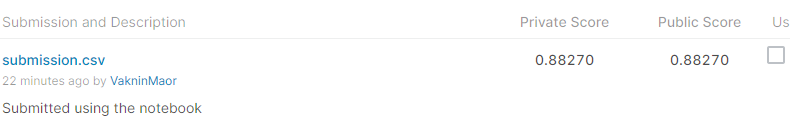

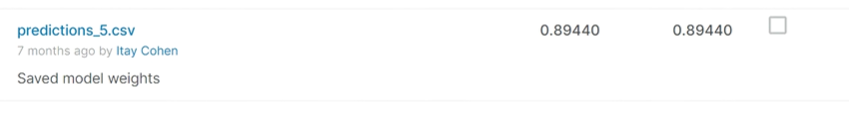